# 2. Runner notebook
Create a runner notebook using papermill to run the template notebook across all tokens in the database and the last 2 complete weeks in the database. Summarize the following in a single DataFrame in the runner notebook
    - avg hourly return by run
    - avg volatility by run
    - maximum drawdown over the entire period of each run
    - range of last close price - first close price

In [1]:
import papermill as pm
import scrapbook as sb
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import os

/Users/anhpham/opt/anaconda3/envs/mfe-preprogram/lib/python3.8/site-packages/papermill/iorw.py:50: FutureWarning: pyarrow.HadoopFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  from pyarrow import HadoopFileSystem


In [2]:
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
def last_dow(d: datetime, dow: int) -> datetime:
    '''
    Get the date of the last day of the week (Monday:0; Sunday:6)
    Input: 
    Output:
    '''
    dow_d = d.weekday()
    days_delta = (7 - dow) + dow_d if dow_d < dow else dow_d - dow
    return d - timedelta(days=days_delta)


In [4]:
import sqlite3


In [5]:
%%capture
%load_ext sql
%sql sqlite:///data/data.db

In [6]:
conn = sqlite3.connect('data/data.db')
cur = conn.cursor()

In [7]:
%%sql 

SELECT max(ts) FROM ohlc  

 * sqlite:///data/data.db
Done.


max(ts)
2021-12-15 00:00:00


In [23]:
%%sql all_tokens <<

SELECT DISTINCT(token) FROM ohlc

 * sqlite:///data/data.db
Done.
Returning data to local variable all_tokens


In [64]:
# token_list = token_list.to_list()
token_list = [str(tk[0]) for tk in all_tokens]
for tk in token_list:
    print(tk)

BTC
ETH
USDT
SOL
ADA
DOT
AVAX
ATOM
CRV
AAVE
COMP


In [25]:
run_dates = [(last_dow(datetime(2021, 12, 1),4) + timedelta(days=7 * x)) for x in range(2)]
connection_string = 'sqlite:///data/data.db'
events_db = 'crypto_events_database'

In [26]:
base_output_folder = os.path.expanduser('outputs')

if not os.path.exists(base_output_folder):
    os.makedirs(base_output_folder)

In [66]:
for run_date in run_dates:
    for token in token_list:
        print(f'running for {token} for date {run_date} to {run_date + timedelta(days=7)}', end='\r')
        res = pm.execute_notebook(
            'homework_4_template.ipynb',
            f'{base_output_folder}/market_analysis_{token}_{run_date}.ipynb',
            parameters = {
                'from_date': f'{run_date}',
                'to_date': f'{run_date + timedelta(days=14)}',
                'token': token,
                'connection_string': connection_string,
                'events_db': events_db
            }
        )

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

### market_analysis_AAVE_2021-11-26 00:00:00

#### summary_plot

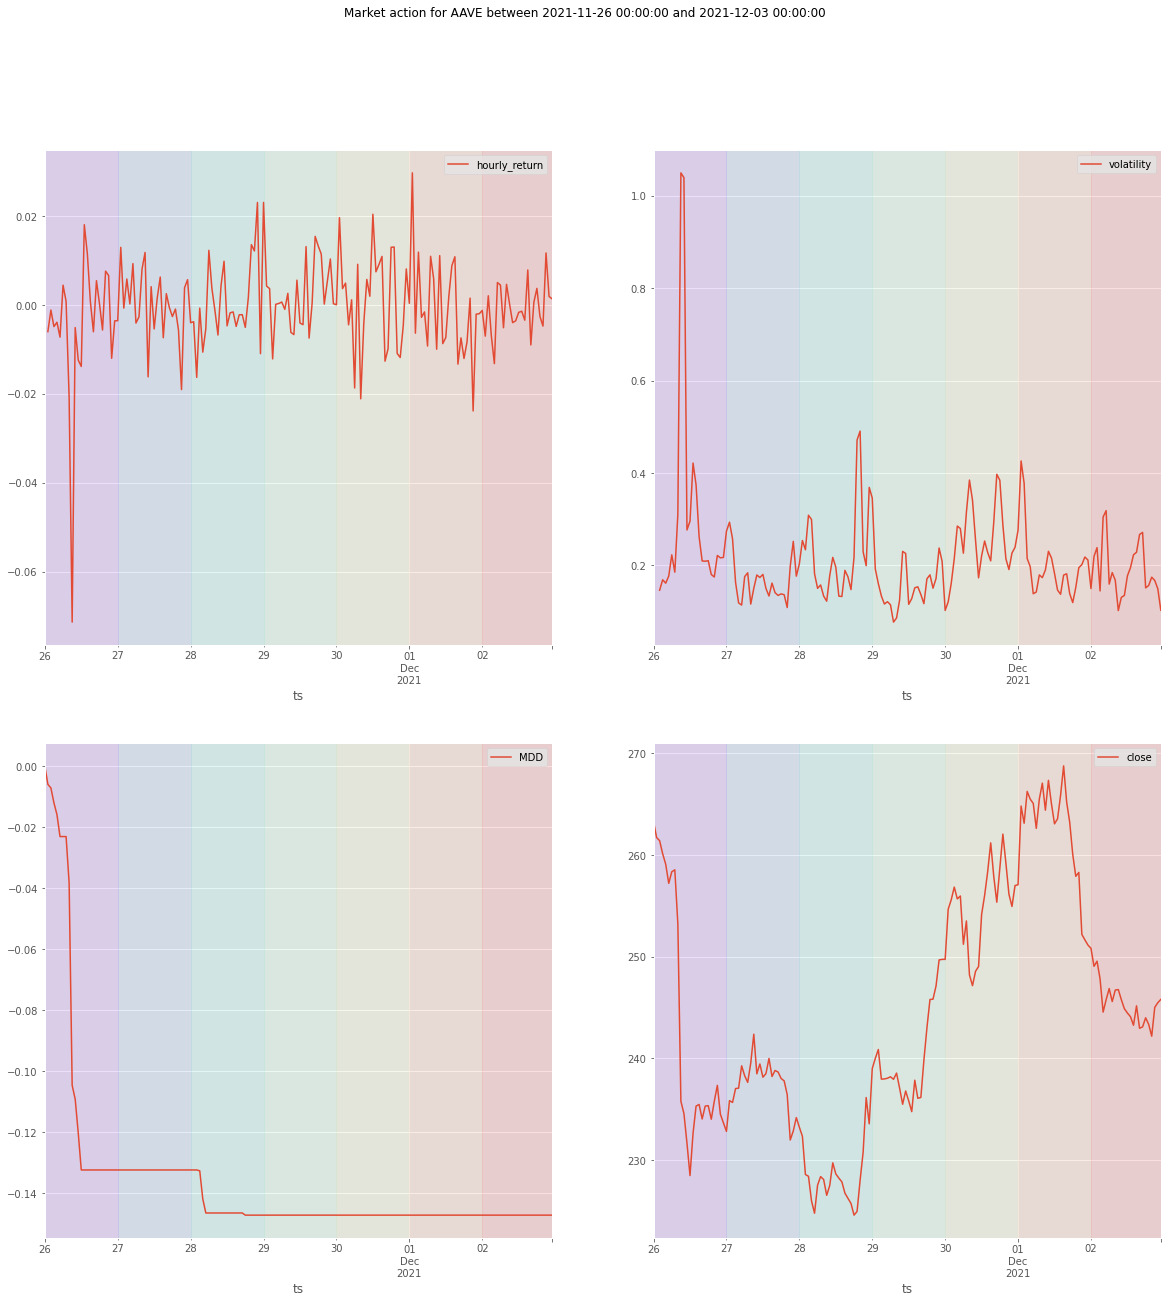

<hr>

### market_analysis_AAVE_2021-12-03 00:00:00

#### summary_plot

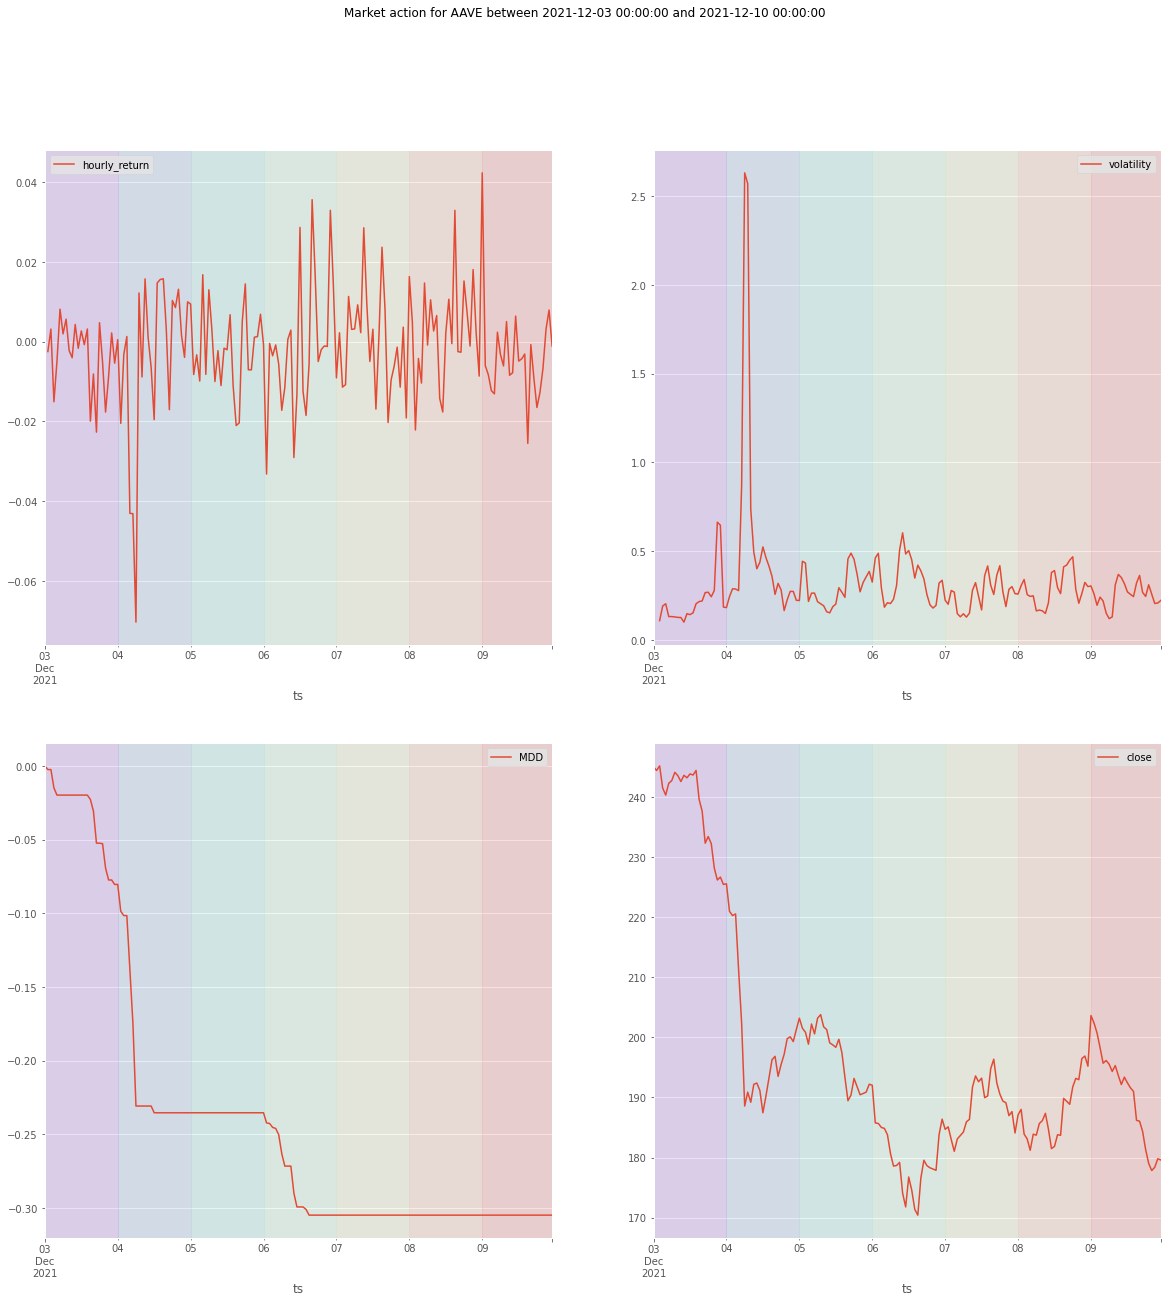

<hr>

### market_analysis_ADA_2021-11-26 00:00:00

#### summary_plot

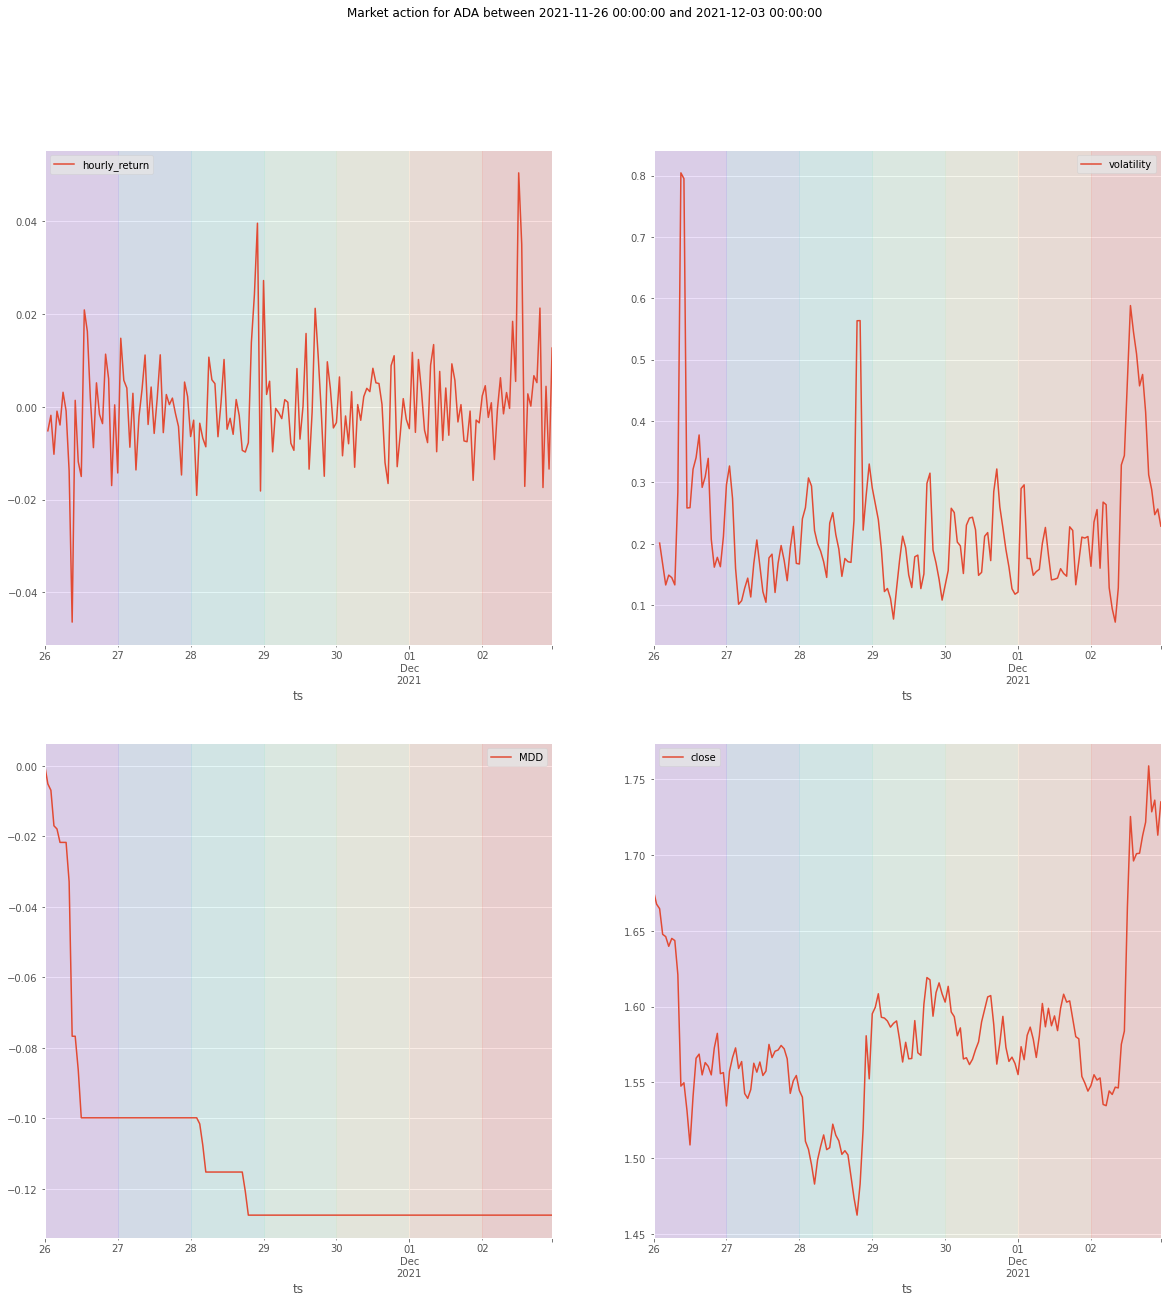

<hr>

### market_analysis_ADA_2021-12-03 00:00:00

#### summary_plot

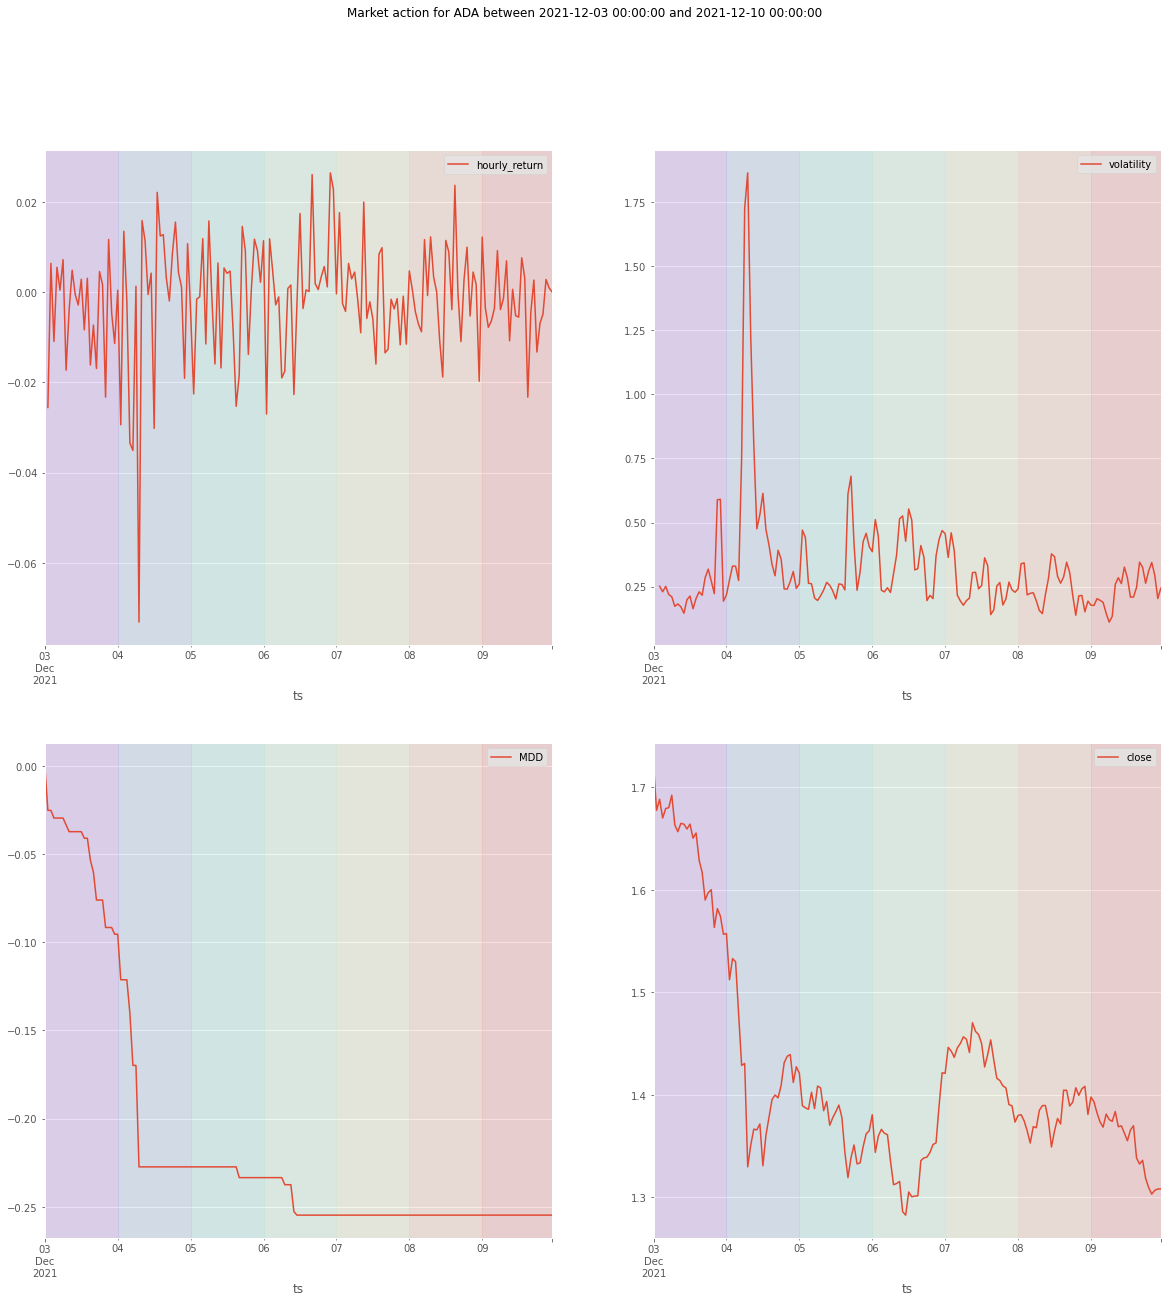

<hr>

### market_analysis_ATOM_2021-11-26 00:00:00

#### summary_plot

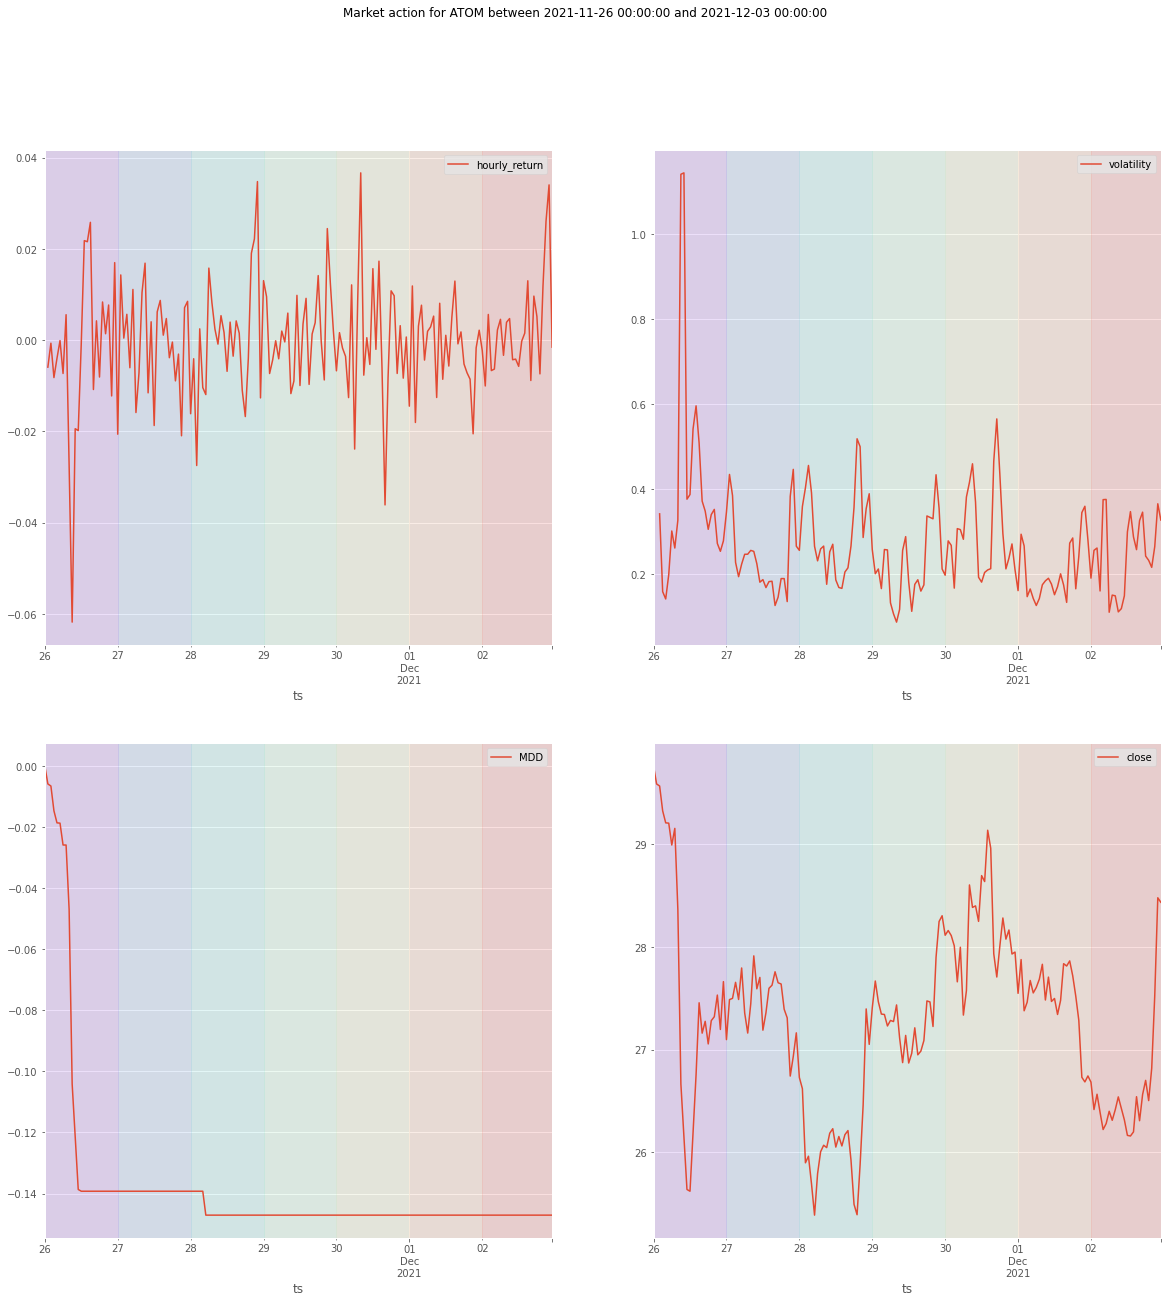

<hr>

### market_analysis_ATOM_2021-12-03 00:00:00

#### summary_plot

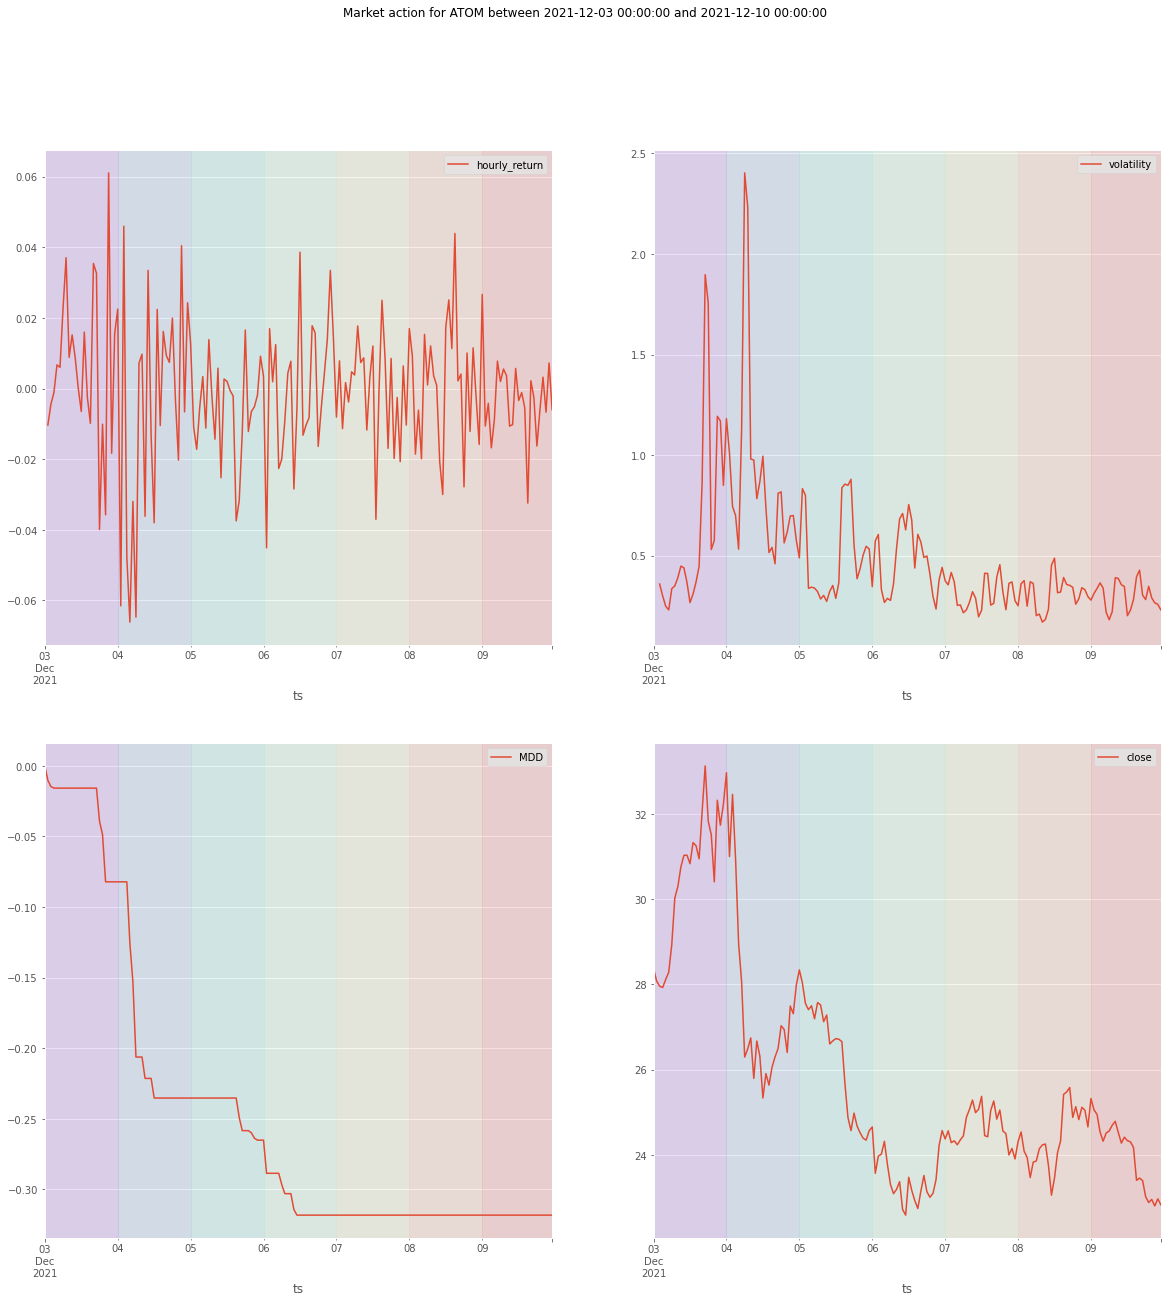

<hr>

### market_analysis_AVAX_2021-11-26 00:00:00

#### summary_plot

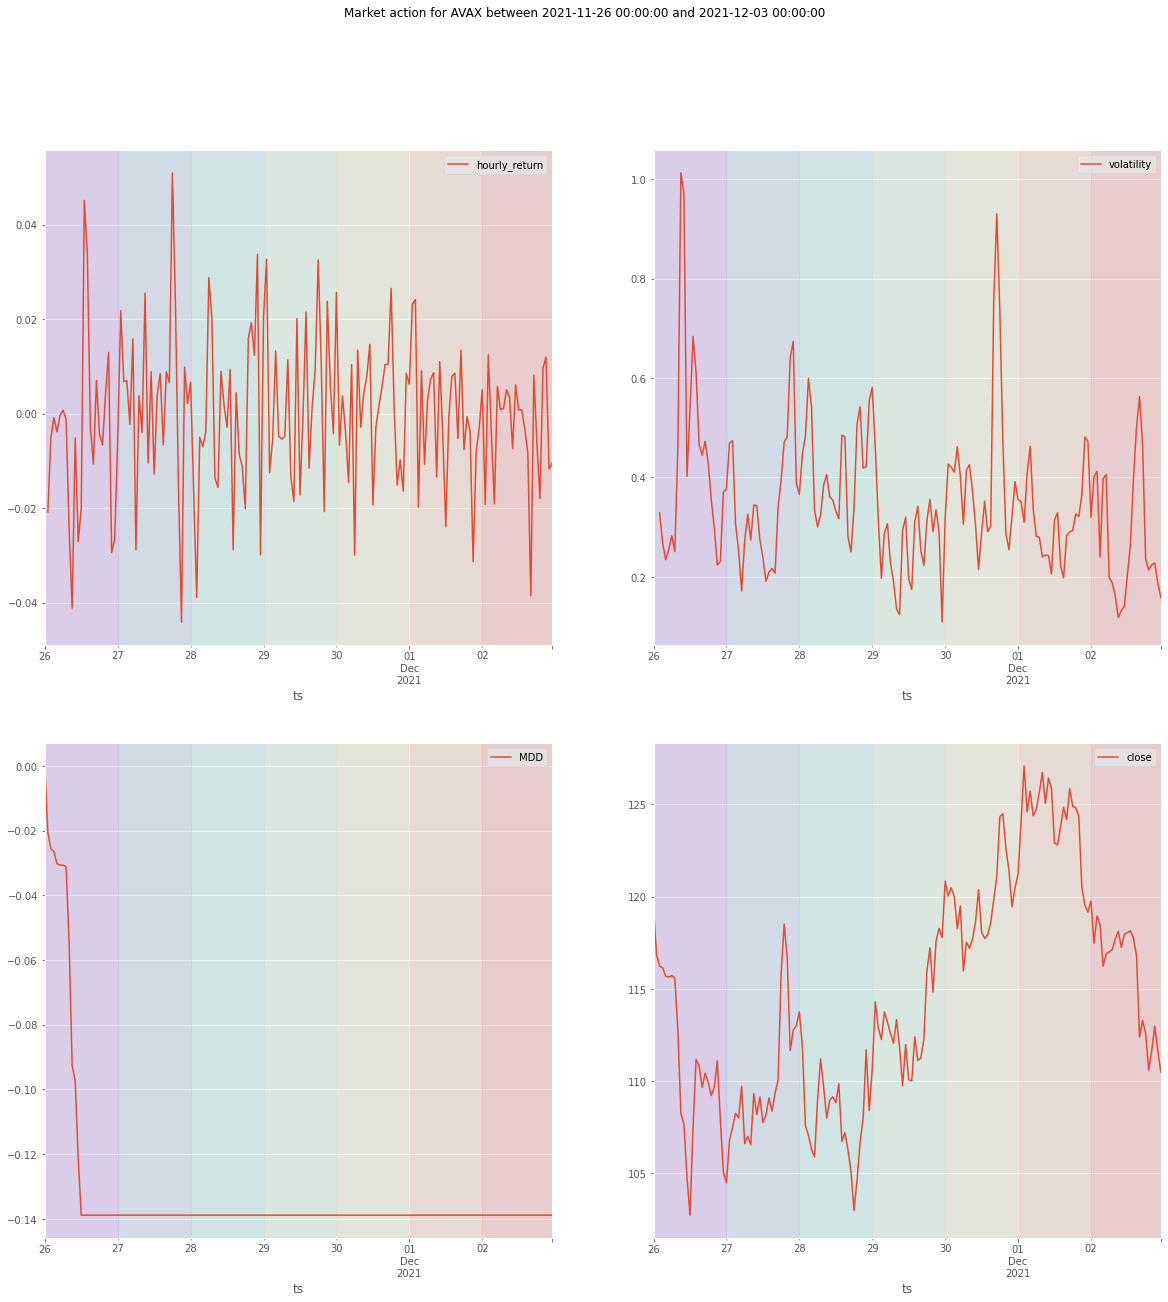

<hr>

### market_analysis_AVAX_2021-12-03 00:00:00

#### summary_plot

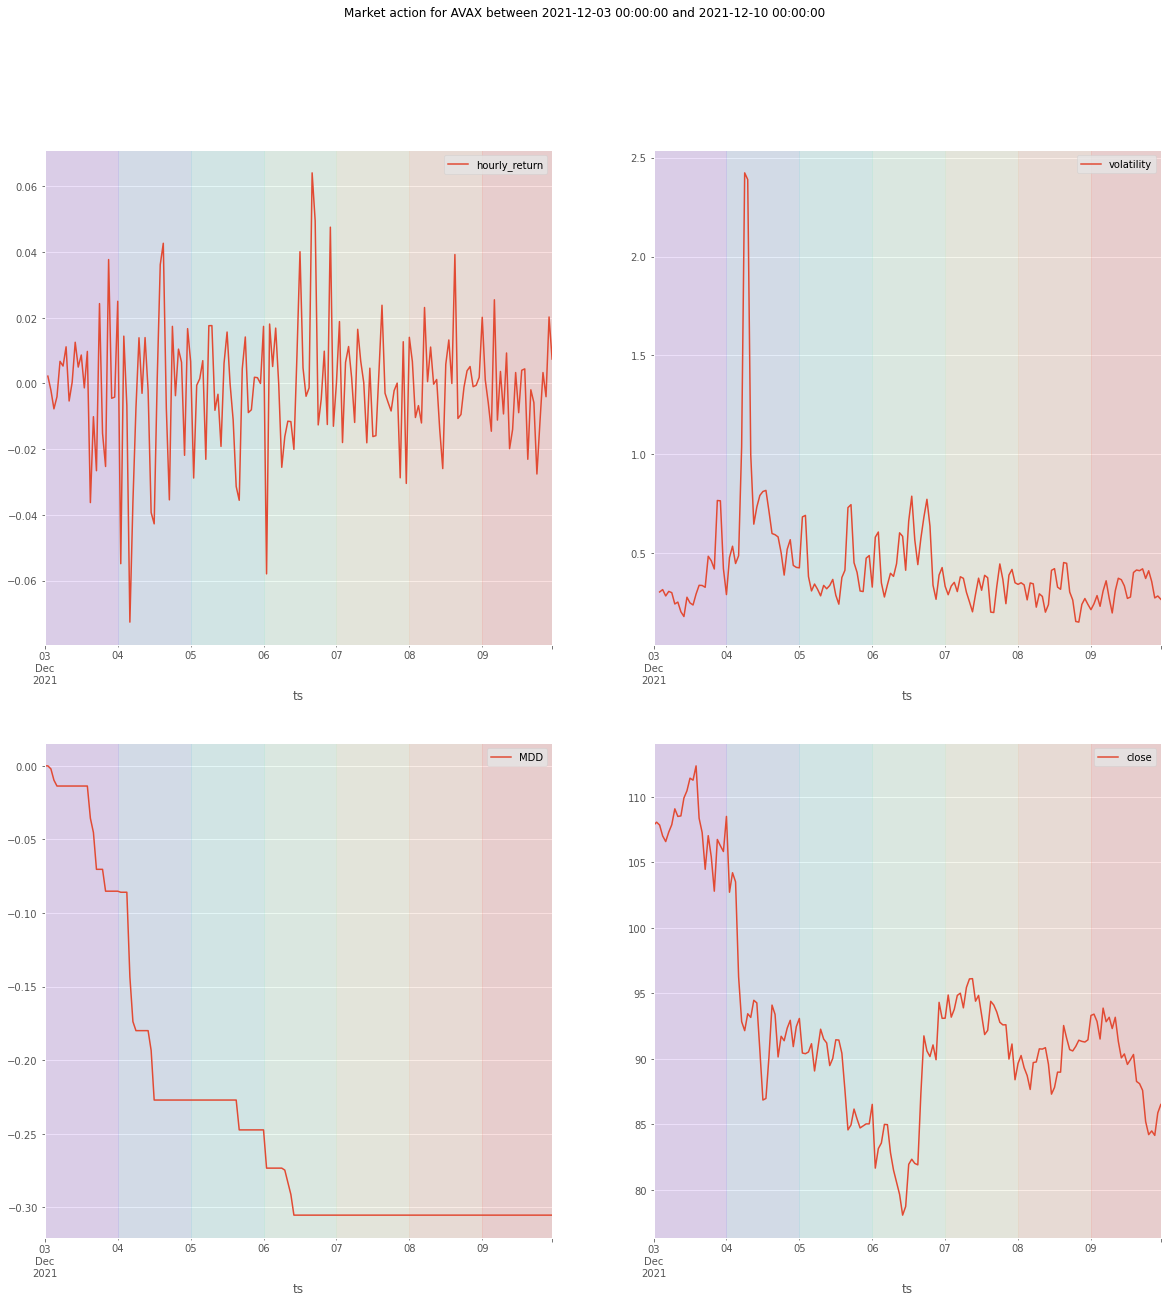

<hr>

### market_analysis_BTC_2021-11-26 00:00:00

#### summary_plot

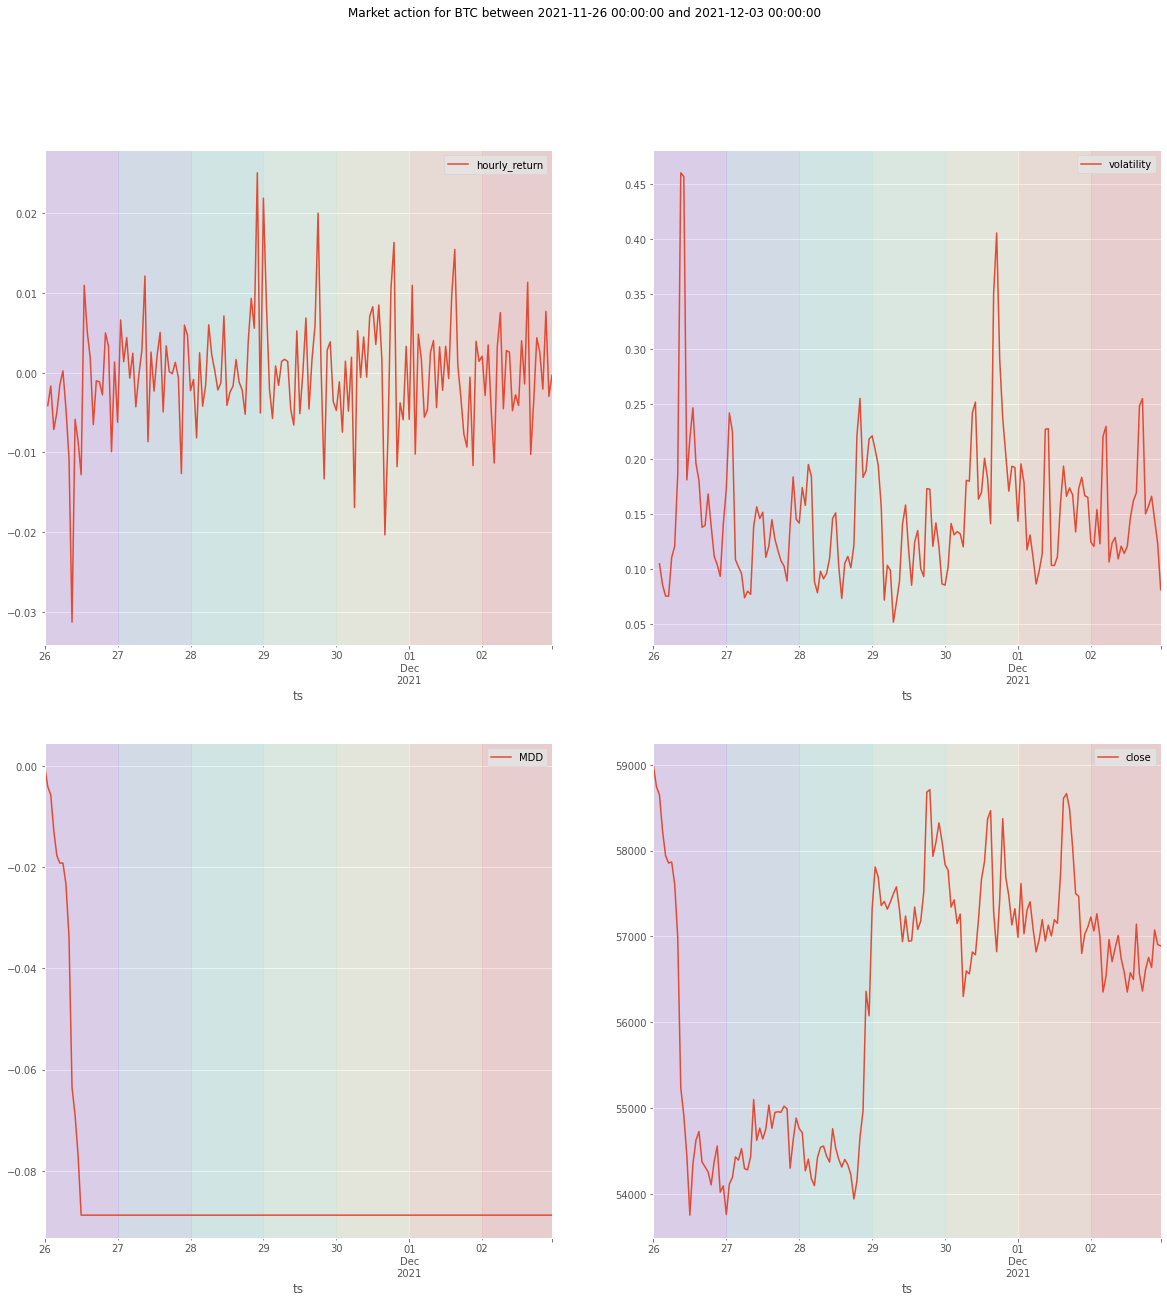

<hr>

### market_analysis_BTC_2021-12-03 00:00:00

#### summary_plot

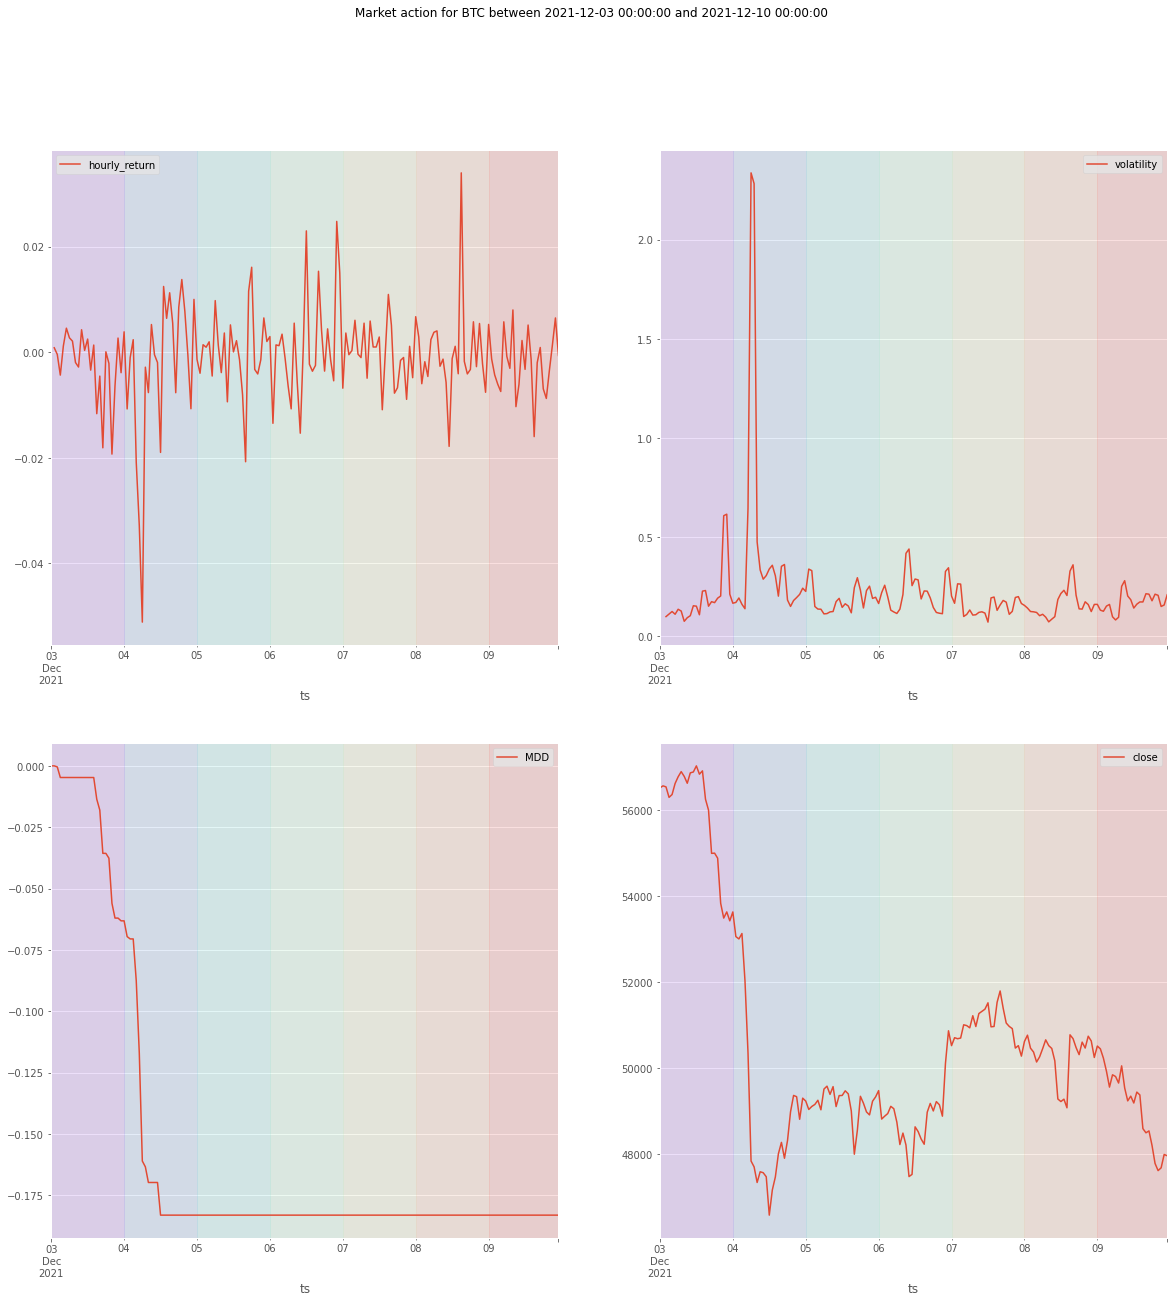

<hr>

### market_analysis_COMP_2021-11-26 00:00:00

#### summary_plot

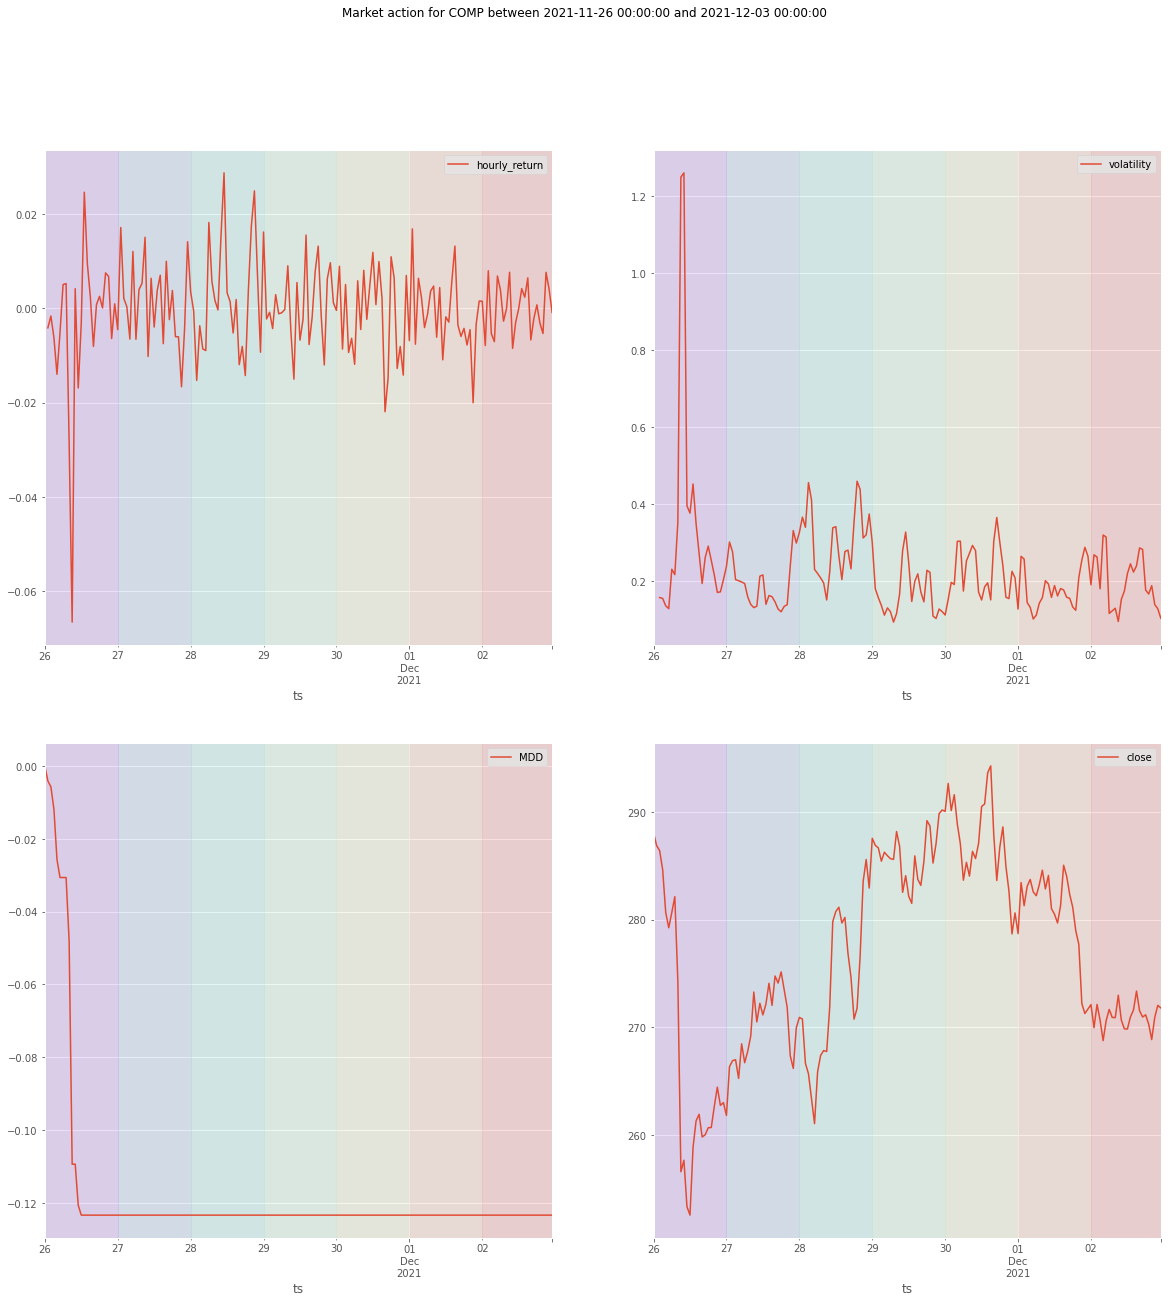

<hr>

### market_analysis_COMP_2021-12-03 00:00:00

#### summary_plot

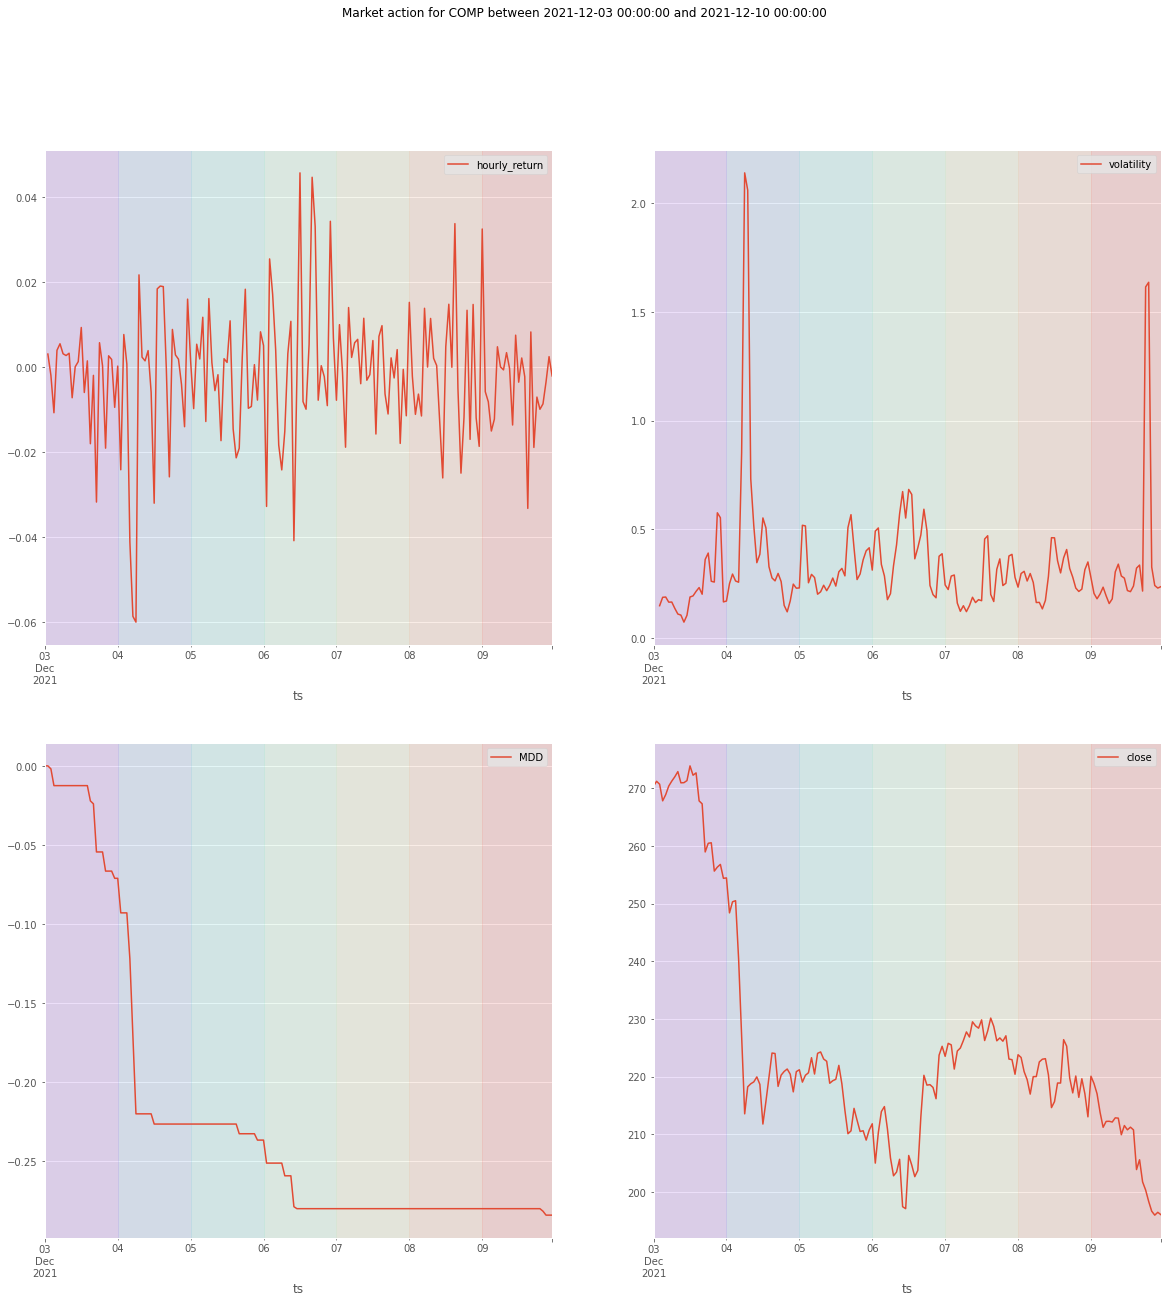

<hr>

### market_analysis_CRV_2021-11-26 00:00:00

#### summary_plot

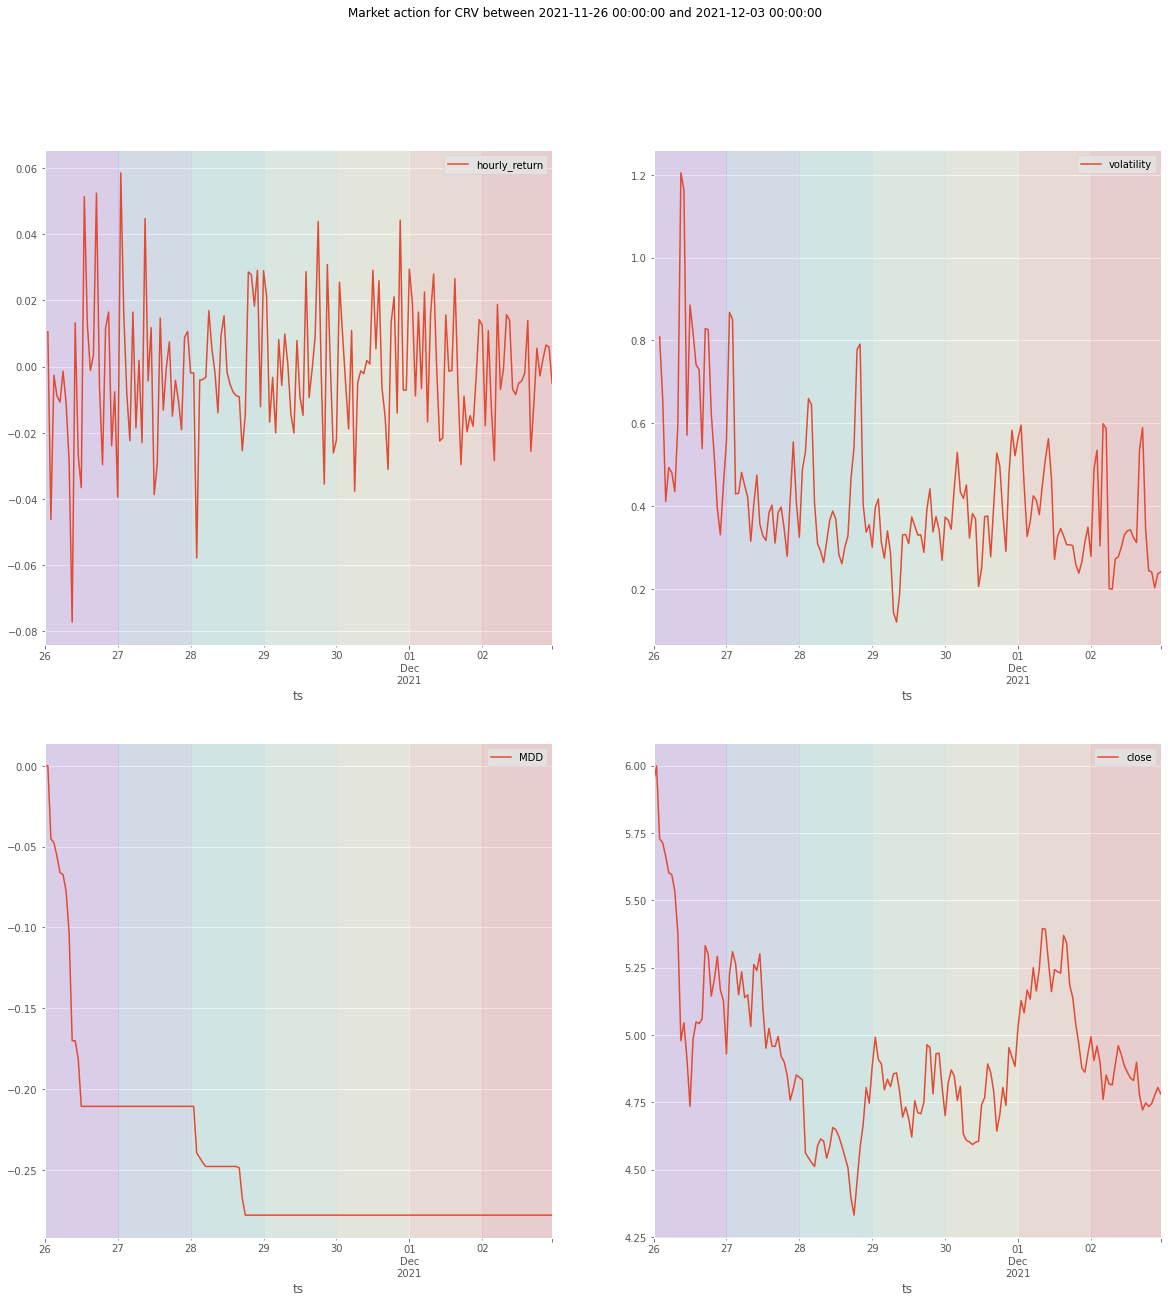

<hr>

### market_analysis_CRV_2021-12-03 00:00:00

#### summary_plot

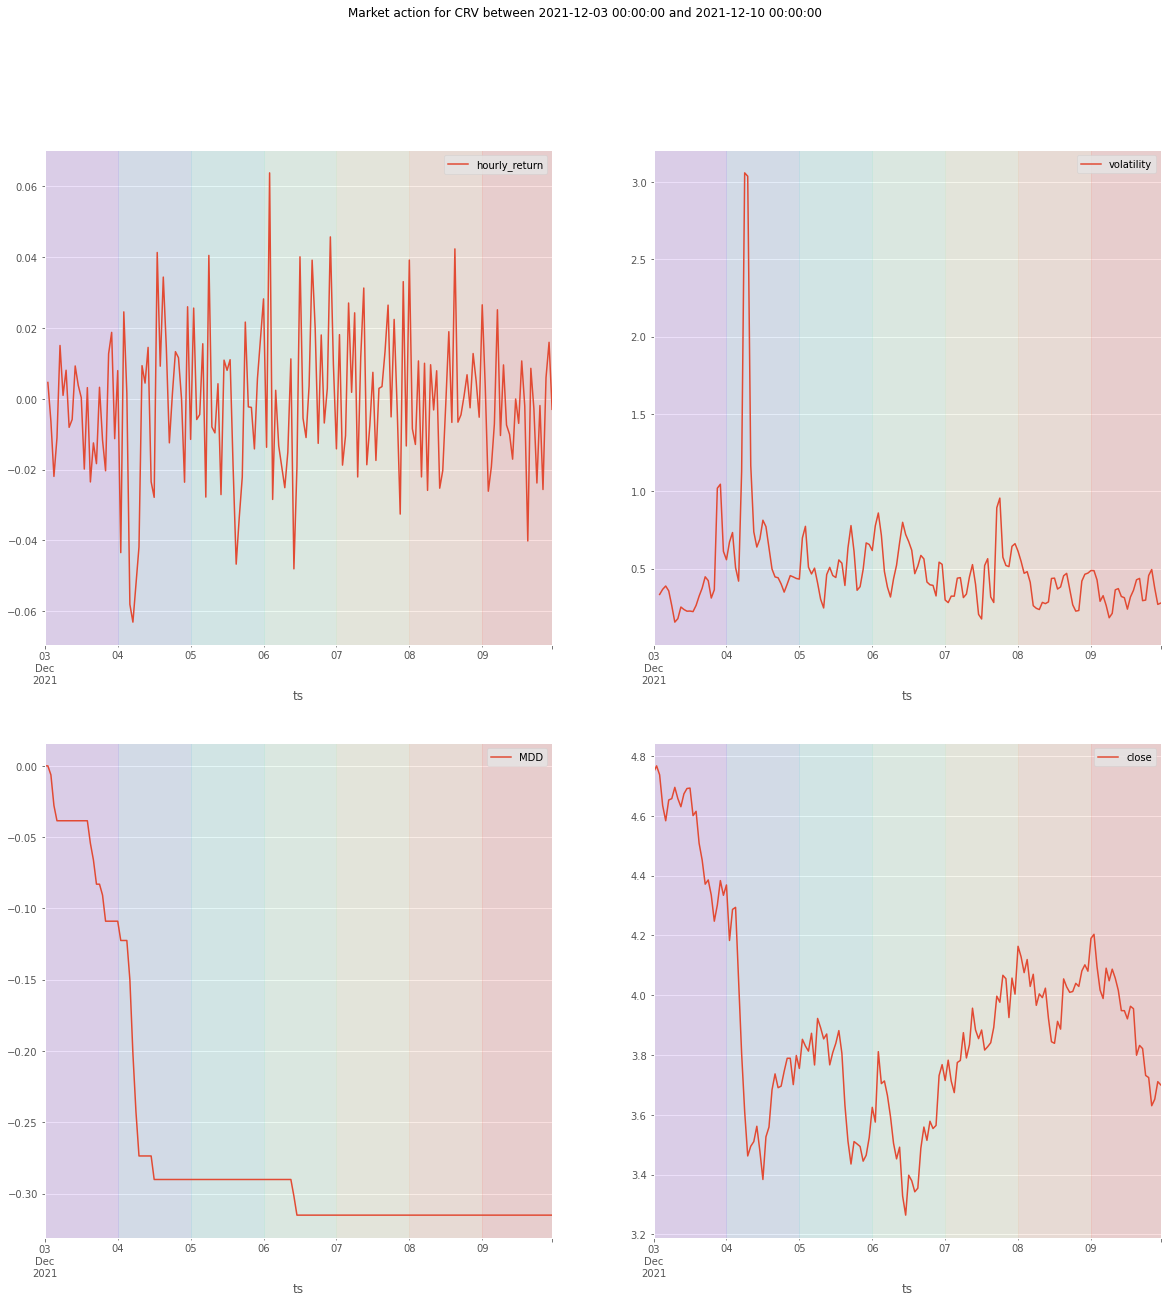

<hr>

### market_analysis_DOT_2021-11-26 00:00:00

#### summary_plot

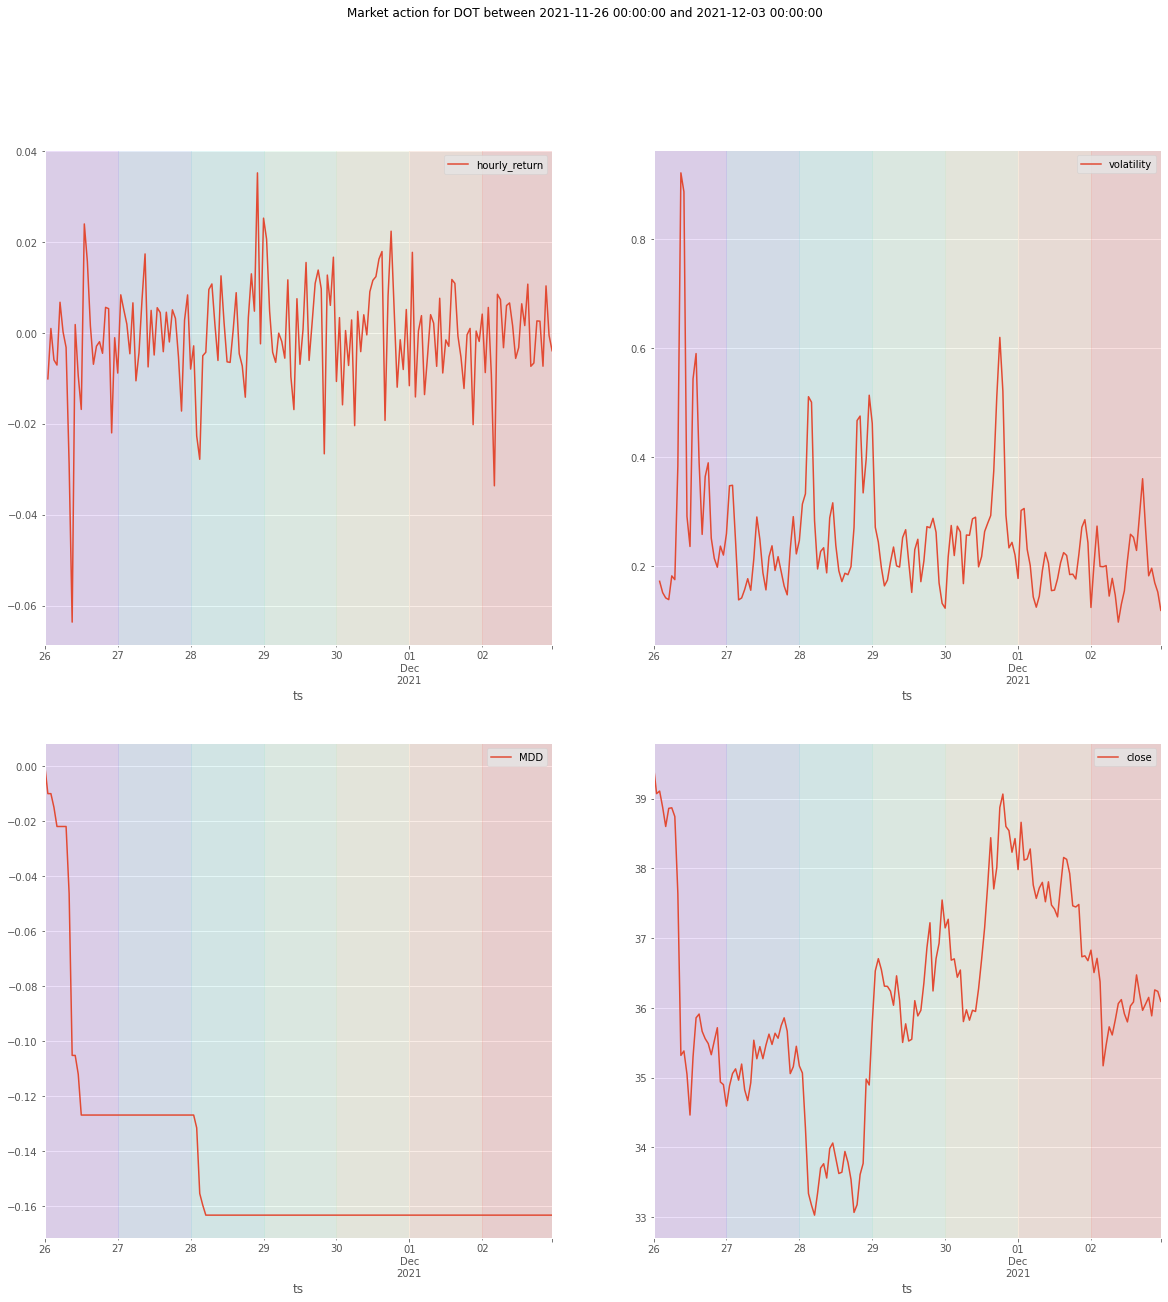

<hr>

### market_analysis_DOT_2021-12-03 00:00:00

#### summary_plot

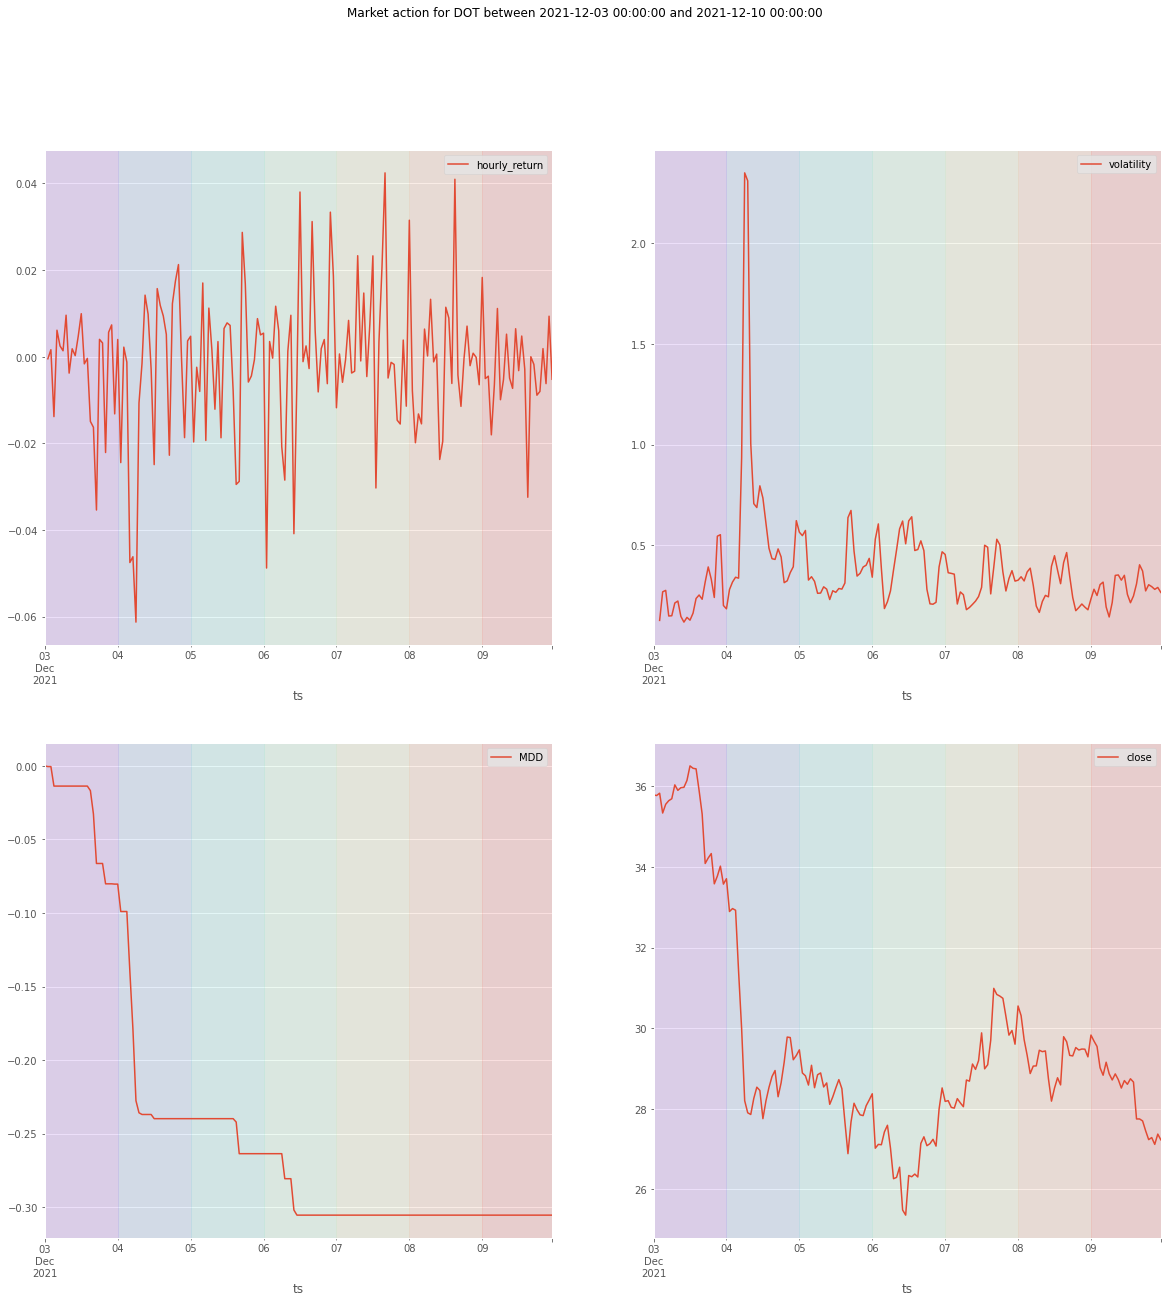

<hr>

### market_analysis_ETH_2021-11-26 00:00:00

#### summary_plot

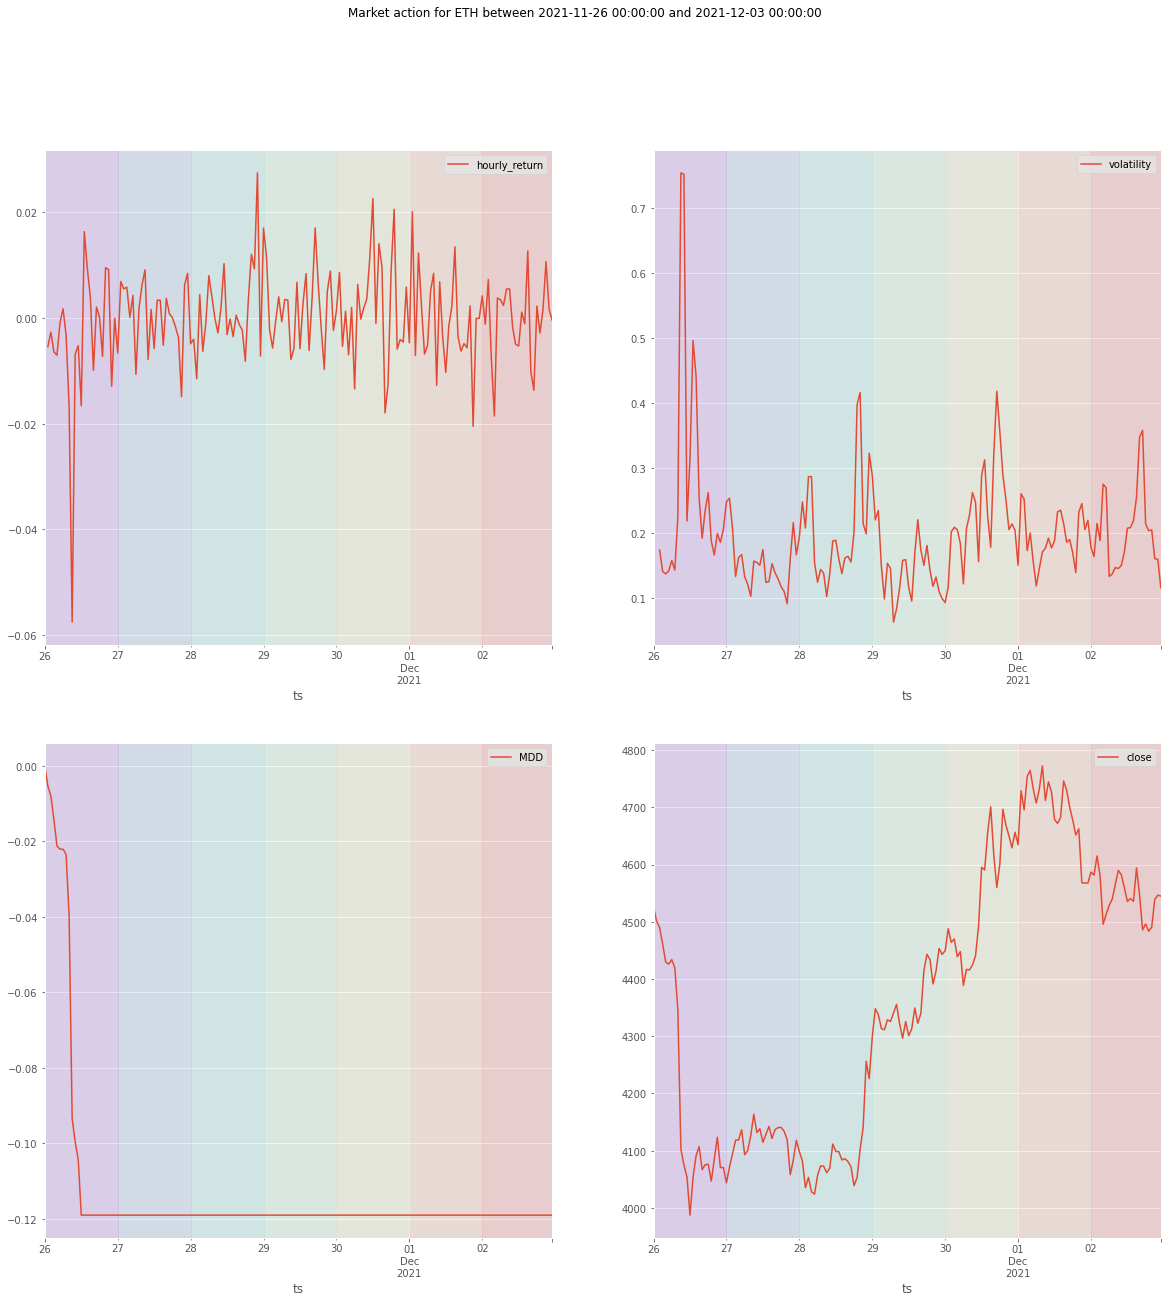

<hr>

### market_analysis_ETH_2021-12-03 00:00:00

#### summary_plot

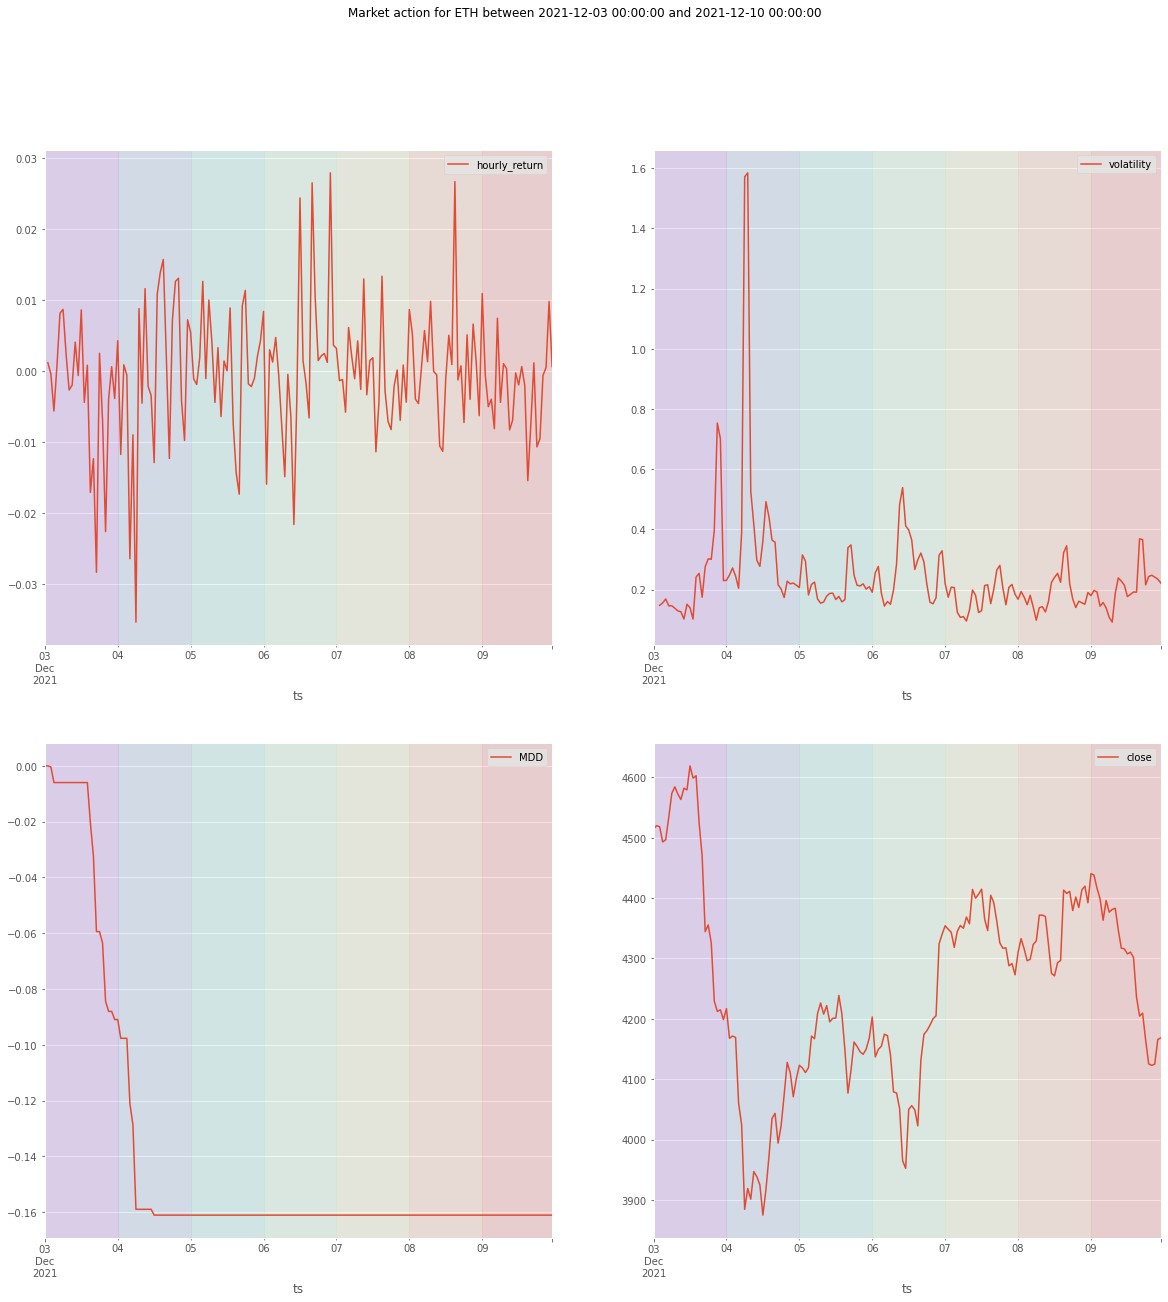

<hr>

### market_analysis_SOL_2021-11-26 00:00:00

#### summary_plot

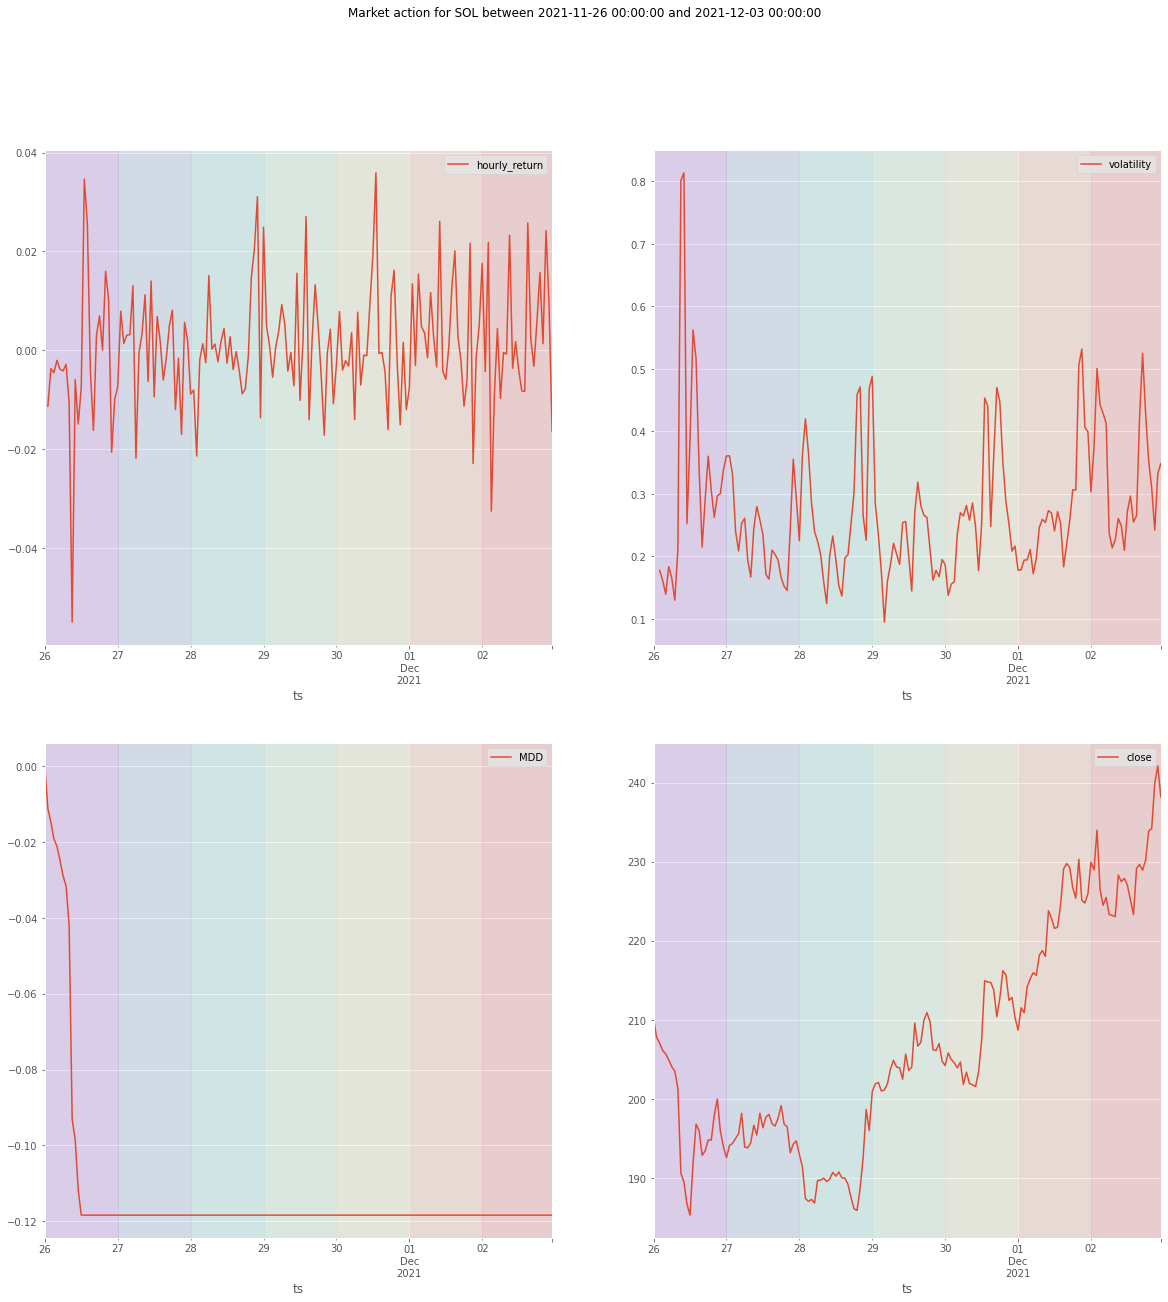

<hr>

### market_analysis_SOL_2021-12-03 00:00:00

#### summary_plot

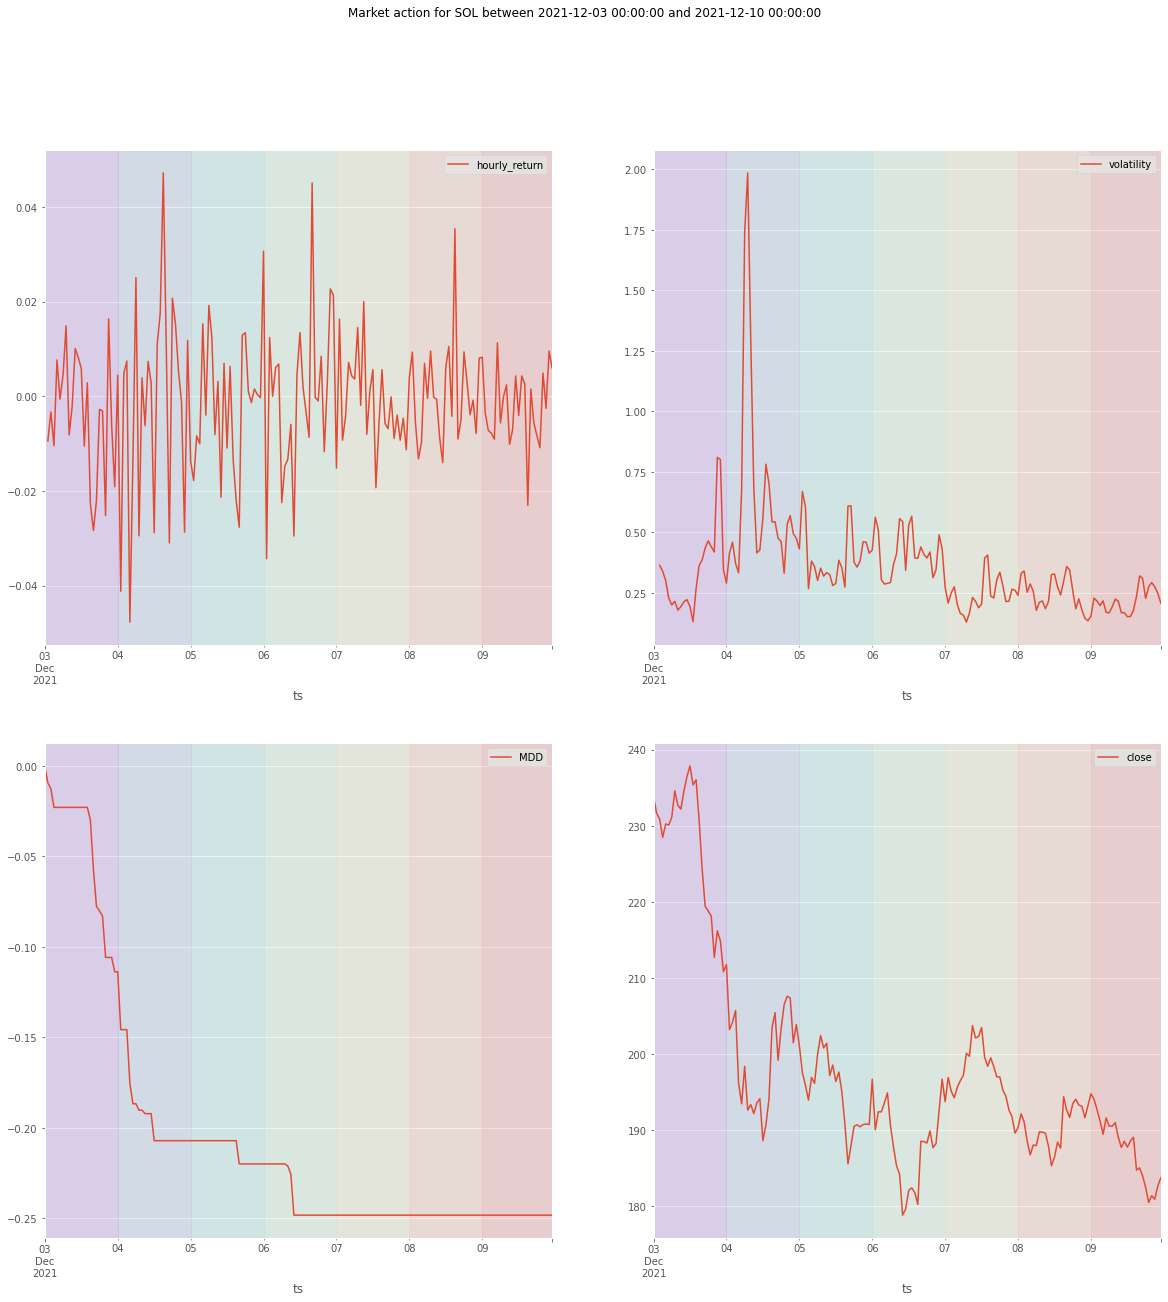

<hr>

### market_analysis_USDT_2021-11-26 00:00:00

#### summary_plot

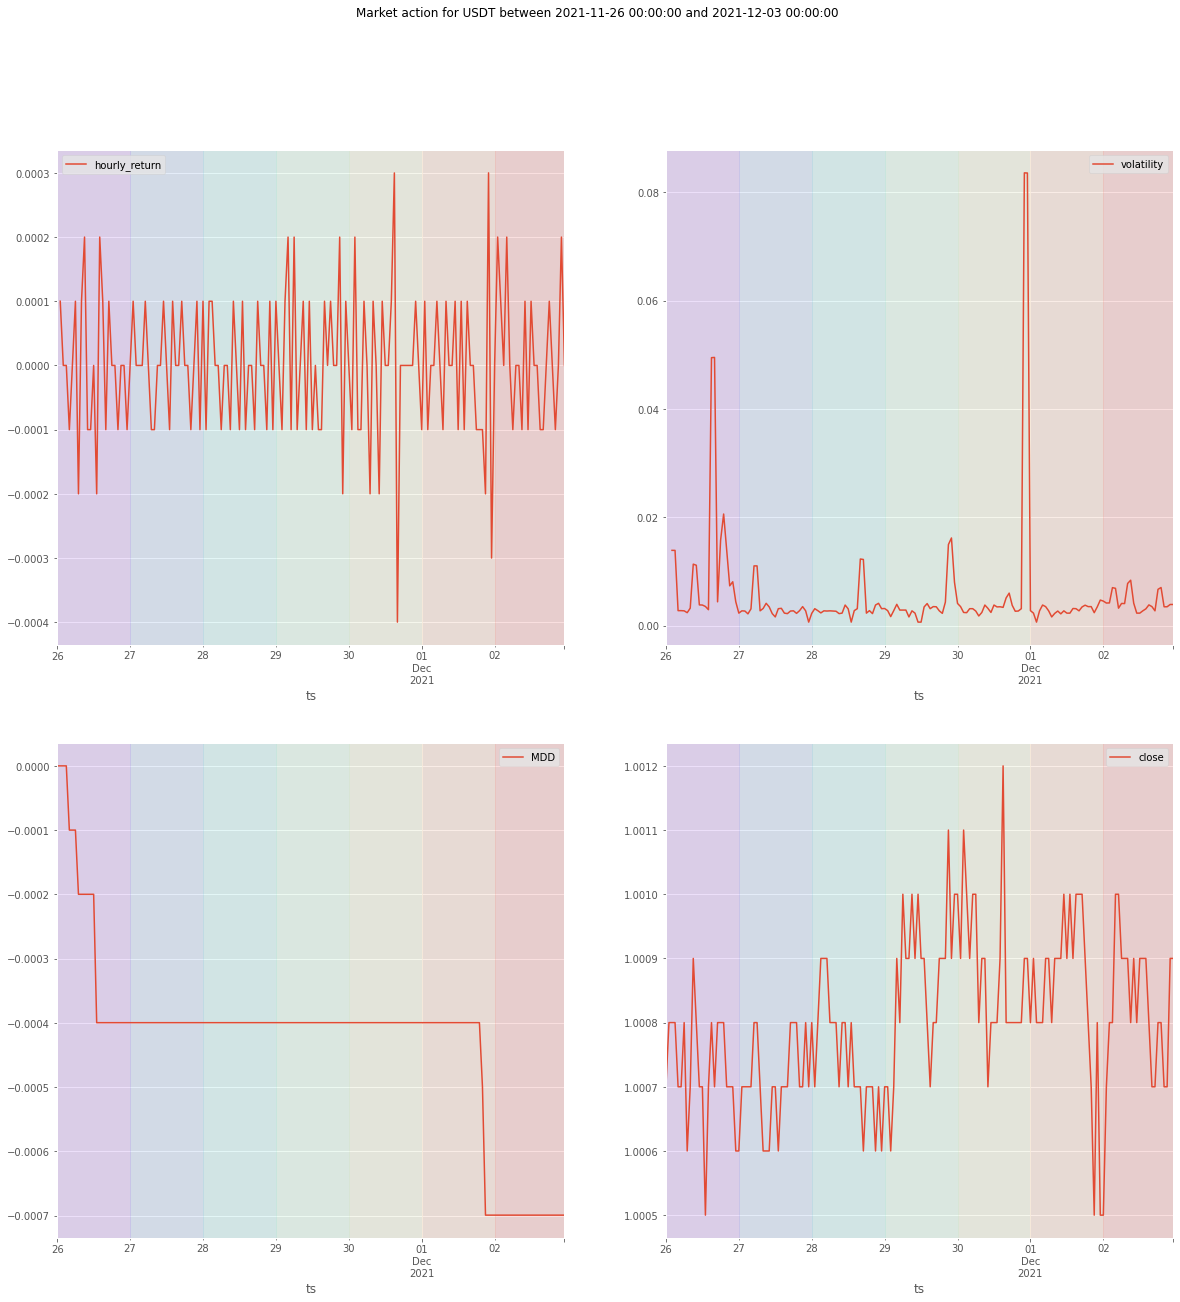

<hr>

### market_analysis_USDT_2021-12-03 00:00:00

#### summary_plot

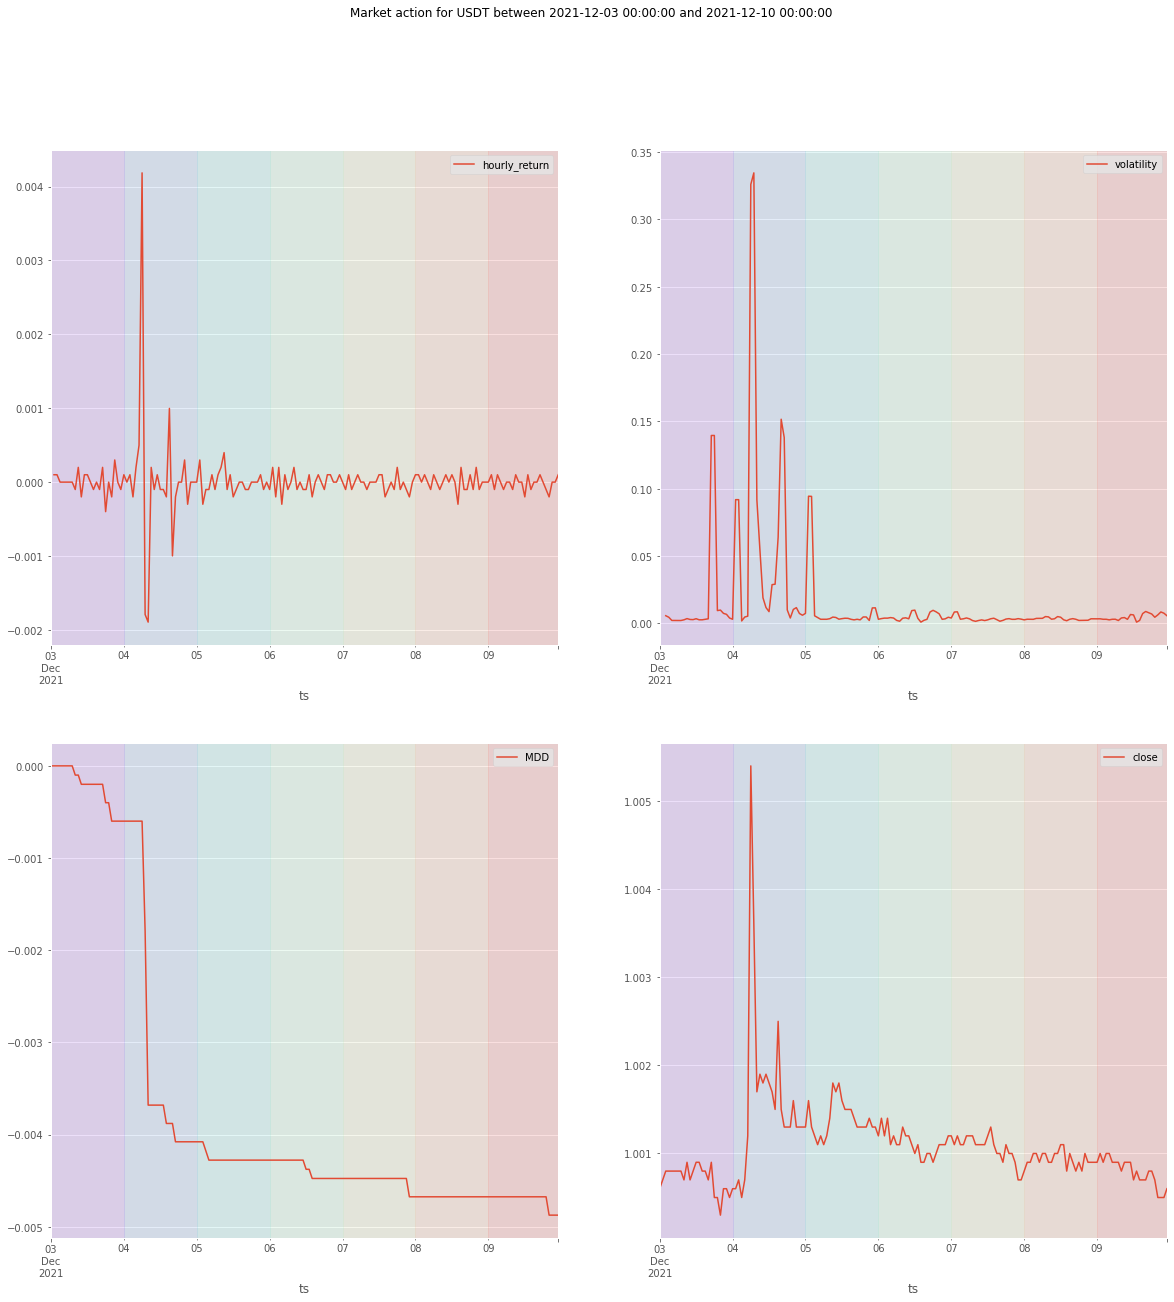

In [96]:
nbs = sb.read_notebooks('outputs')
nbs.scraps_report()

In [101]:
def sum_by_token(scrap):
    ans = pd.Series(
        {
            'token':scrap['token'].data,
            'from_date':scrap['from_date'].data,
            'to_date':scrap['to_date'].data,
            'hourly_return':scrap['prices'].data.hourly_return.mean(),
            'volatility':scrap['prices'].data.volatility.mean(),
            'MDD':scrap['prices'].data.MDD.iloc[-1],
            'last-first':scrap['prices'].data.close.iloc[-1] 
            - scrap['prices'].data.close.iloc[0]
            
        }
    )
    return ans

In [102]:
summary = pd.DataFrame([sum_by_token(scrap) for book, scrap in nbs.notebook_scraps.items()])   

In [103]:
summary

,token,from_date,to_date,hourly_return,volatility,MDD,last-first
0,AAVE,2021-11-26 00:00:00,2021-12-03 00:00:00,-4.121321e-04,0.213434,-0.147100,-17.5130
1,AAVE,2021-12-03 00:00:00,2021-12-10 00:00:00,-1.859135e-03,0.317516,-0.304774,-65.3840
2,ADA,2021-11-26 00:00:00,2021-12-03 00:00:00,2.064556e-04,0.223739,-0.127491,0.0588
3,ADA,2021-12-03 00:00:00,2021-12-10 00:00:00,-1.642346e-03,0.320668,-0.254750,-0.4128
4,ATOM,2021-11-26 00:00:00,2021-12-03 00:00:00,-2.735259e-04,0.272328,-0.147057,-1.3290
5,ATOM,2021-12-03 00:00:00,2021-12-10 00:00:00,-1.301783e-03,0.487811,-0.318250,-5.5440
6,AVAX,2021-11-26 00:00:00,2021-12-03 00:00:00,-4.593791e-04,0.353073,-0.138894,-8.8100
7,AVAX,2021-12-03 00:00:00,2021-12-10 00:00:00,-1.319137e-03,0.425879,-0.305331,-21.3200
8,BTC,2021-11-26 00:00:00,2021-12-03 00:00:00,-2.169021e-04,0.151728,-0.088763,-2098.4400
9,BTC,2021-12-03 00:00:00,2021-12-10 00:00:00,-9.823465e-04,0.218764,-0.183139,-8551.8100
